<a href="https://colab.research.google.com/github/PratyushNag/Music-Generator-v1/blob/main/Music_Generation_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
! pip install -q kaggle
#upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pratyush2121","key":"0c2970507df641f44be3e0a34b17fdc0"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d imsparsh/lakh-midi-clean

100% 226M/226M [00:02<00:00, 101MB/s] 
100% 226M/226M [00:02<00:00, 84.4MB/s]


In [ ]:
! mkdir Midi
! unzip lakh-midi-clean.zip -d Midi

Streaming output truncated to the last 5000 lines.
  inflating: Midi/Rogers_Kenny/She_Believes_In_Me.mid  
  inflating: Midi/Rogers_Kenny/The_Gambler.1.mid  
  inflating: Midi/Rogers_Kenny/The_Gambler.2.mid  
  inflating: Midi/Rogers_Kenny/The_Gambler.mid  
  inflating: Midi/Rogers_Kenny/Through_the_Years.mid  
  inflating: Midi/Romantics/Talking_In_Your_Sleep.mid  
  inflating: Midi/Romantics/What_I_Like_About_You.mid  
  inflating: Midi/Romina_Power_Al_Bano/Domani,_domani.mid  
  inflating: Midi/Romina_Power_Al_Bano/Felicita.1.mid  
  inflating: Midi/Romina_Power_Al_Bano/Felicita.mid  
  inflating: Midi/Romina_Power_Al_Bano/Sempre_sempre.1.mid  
  inflating: Midi/Romina_Power_Al_Bano/Sempre_sempre.mid  
  inflating: Midi/Romina_Power_Al_Bano/Sha-e-o.1.mid  
  inflating: Midi/Romina_Power_Al_Bano/Sha-e-o.mid  
  inflating: Midi/Ron/Ferite_e_lacrime_You_.1.mid  
  inflating: Midi/Ron/Ferite_e_lacrime_You_.mid  
  inflating: Midi/Ron/Il_sole_e_la_luna.1.mid  
  inflating: Midi/Ron/Il_so

In [ ]:
!sudo apt install -y fluidsynth

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

In [ ]:
!pip install --upgrade pyfluidsynth

In [ ]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 6.2 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592284 sha256=7ab45a4ebd9803ca4fd5f50da847372e3671a1fa3fb055a3bdb3ad825603f24b
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [ ]:
!pip install display

  Preparing metadata (setup.py) ... done
  Created wheel for display: filename=display-1.0.0-py3-none-any.whl size=1380 sha256=1037f95095a1de57591ffcb543240873123fd0a8965c304792d5839f68082031
  Stored in directory: /root/.cache/pip/wheels/c8/03/f5/a10e442f4903dd16b0e7914afe0f24392305535fd6f9cef522
Successfully built display


In [26]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import pretty_midi
import fluidsynth
from IPython.display import display, Audio
import collections
from typing import Optional
import tensorflow as tf
import keras
from keras.datasets import imdb
from keras.layers import Dense, LSTM, Dropout, MaxPooling1D, Flatten, AveragePooling1D, AveragePooling2D, MaxPooling2D
from keras.losses import BinaryCrossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

In [42]:
paths = []
for dirname, _, filenames in os.walk('Midi'):
    for filename in filenames:
        if filename.lower().endswith(".mid"):
            paths.append(os.path.join(dirname, filename))

In [43]:
midi_df = pd.DataFrame()
midi_df['midi'] = paths
midi_df.tail()

,midi
17227,Midi/Boyz_II_Men/A_Song_for_Mama.mid
17228,Midi/Boyz_II_Men/Yesterday.1.mid
17229,Midi/Boyz_II_Men/End_of_the_Road.2.mid
17230,Midi/The_Sylvers/Boogie_Fever.mid
17231,Midi/Billy_Crash_Craddock/Sea_Cruise.mid


In [ ]:
pm = pretty_midi.PrettyMIDI(midi_df.loc[0, 'midi'])

In [ ]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
    waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
    waveform_short = waveform[:seconds*_SAMPLING_RATE]
    return display(Audio(waveform_short, rate=_SAMPLING_RATE))

In [ ]:
display_audio(pm)

In [ ]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 11
Instrument name: Lead 2 (sawtooth)


In [ ]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [44]:
raw_notes = midi_to_notes(midi_df.loc[0, 'midi'])
raw_notes.head()

,pitch,start,end,step,duration
0,65,21.142836,21.428550,0.000000,0.285714
1,65,21.428550,21.714264,0.285714,0.285714
2,64,21.714264,21.857121,0.285714,0.142857
3,65,21.857121,22.142835,0.142857,0.285714
4,64,22.142835,22.571406,0.285714,0.428571


In [45]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
raw_notes['note'] = get_note_names(raw_notes['pitch'])
raw_notes

,pitch,start,end,step,duration,note
0,65,21.142836,21.428550,0.000000,0.285714,F4
1,65,21.428550,21.714264,0.285714,0.285714,F4
2,64,21.714264,21.857121,0.285714,0.142857,E4
3,65,21.857121,22.142835,0.142857,0.285714,F4
4,64,22.142835,22.571406,0.285714,0.428571,E4
...,...,...,...,...,...,...
504,64,239.285475,239.428332,0.142857,0.142857,E4
505,65,239.428332,239.571189,0.142857,0.142857,F4
506,64,239.571189,239.714046,0.142857,0.142857,E4
507,60,239.714046,239.856903,0.142857,0.142857,C4


In [36]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

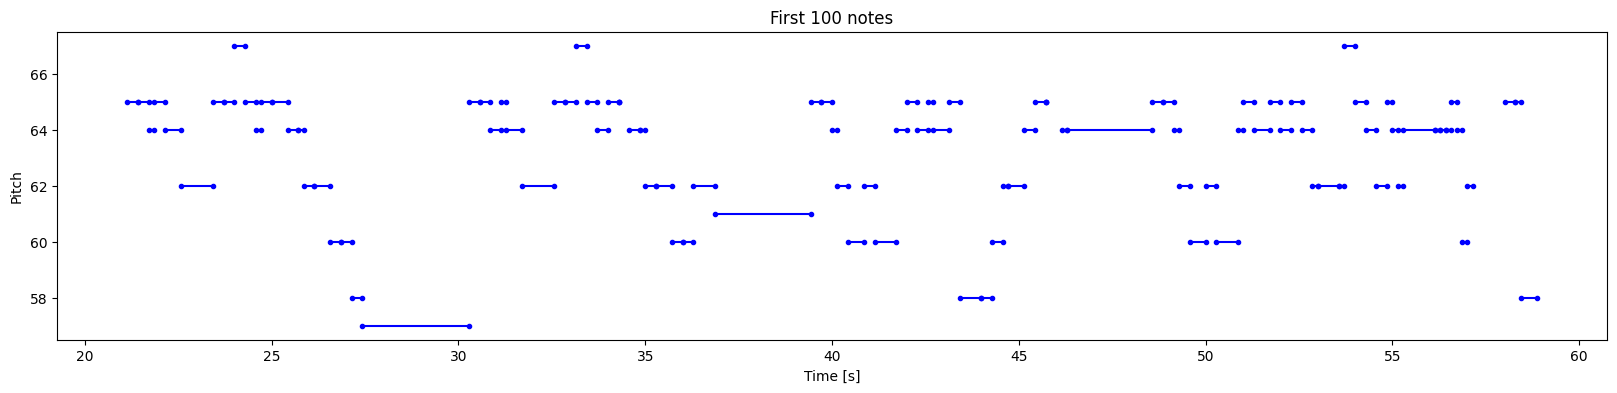

In [37]:
plot_piano_roll(raw_notes, count=100)

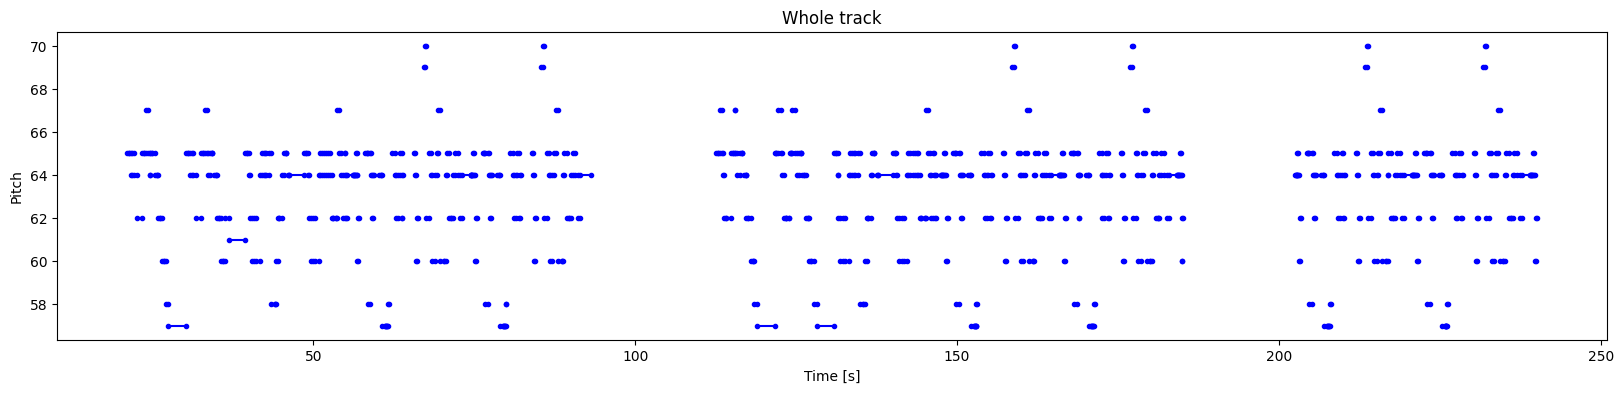

In [38]:
plot_piano_roll(raw_notes)

In [46]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

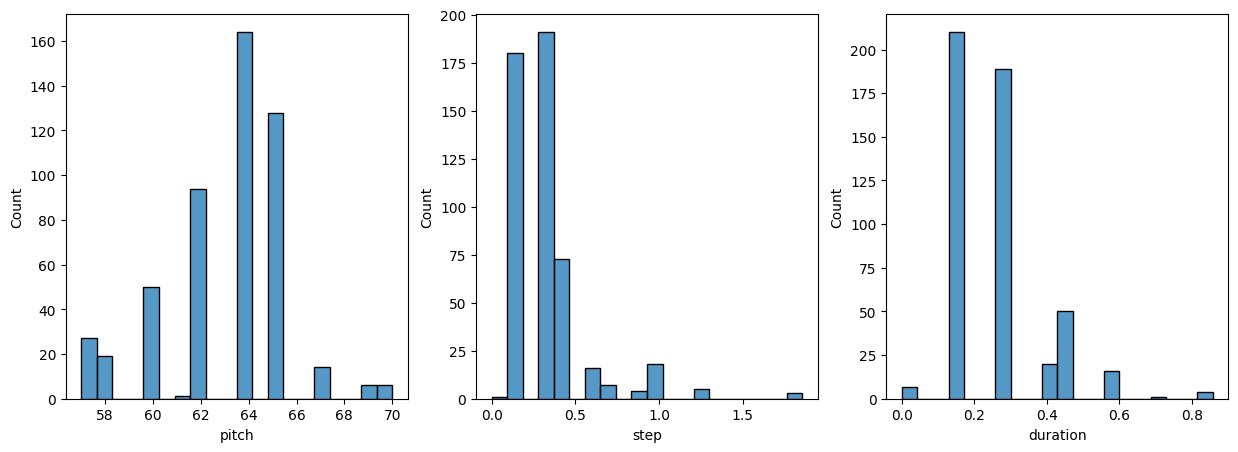

In [47]:
plot_distributions(raw_notes)

In [52]:
num_files = 30
all_notes = []
for f in paths[:num_files]:
  notes = midi_to_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)

/usr/local/lib/python3.10/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


In [53]:
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 21349


In [54]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)

In [55]:
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

In [56]:
def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [58]:
seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [59]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (25, 3)
sequence elements (first 10): tf.Tensor(
[[0.5078125 0.        0.285714 ]
 [0.5078125 0.285714  0.285714 ]
 [0.5       0.285714  0.142857 ]
 [0.5078125 0.142857  0.285714 ]
 [0.5       0.285714  0.428571 ]
 [0.484375  0.428571  0.857142 ]
 [0.5078125 0.857142  0.285714 ]
 [0.5078125 0.285714  0.285714 ]
 [0.5234375 0.285714  0.285714 ]
 [0.5078125 0.285714  0.285714 ]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=64.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.1428570000000029>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.42857099999999804>}


In [60]:
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [61]:
train_ds.element_spec

(TensorSpec(shape=(64, 25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})

In [62]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [118]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x =tf.keras.layers.LSTM(128)(inputs)
outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 25, 3)]              0         []                            
                                                                                                  
 lstm_3 (LSTM)               (None, 128)                  67584     ['input_4[0][0]']             
                                                                                                  
 duration (Dense)            (None, 1)                    129       ['lstm_3[0][0]']              
                                                                                                  
 pitch (Dense)               (None, 128)                  16512     ['lstm_3[0][0]']              
                                                                                            

In [119]:
losses = model.evaluate(train_ds, return_dict=True)
losses

333/333 [==============================] - 8s 21ms/step - loss: 7.8606 - duration_loss: 0.4360 - pitch_loss: 4.8557 - step_loss: 2.5690


{'loss': 7.8606157302856445,
 'duration_loss': 0.4359775483608246,
 'pitch_loss': 4.855682373046875,
 'step_loss': 2.5689573287963867}

In [120]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)

In [121]:
model.evaluate(train_ds, return_dict=True)

333/333 [==============================] - 7s 17ms/step - loss: 3.2477 - duration_loss: 0.4360 - pitch_loss: 4.8557 - step_loss: 2.5690


{'loss': 3.247718095779419,
 'duration_loss': 0.4359775483608246,
 'pitch_loss': 4.855682373046875,
 'step_loss': 2.5689573287963867}

In [69]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [117]:
%%time
epochs = 15

history = model.fit(
    train_ds,
    epochs=epochs
)

Epoch 1/15
333/333 [==============================] - 21s 62ms/step - loss: 1.5454 - duration_loss: 0.0568 - pitch_loss: 1.7265 - step_loss: 1.4023
Epoch 2/15
333/333 [==============================] - 16s 48ms/step - loss: 1.6085 - duration_loss: 0.0572 - pitch_loss: 1.7489 - step_loss: 1.4639
Epoch 3/15
333/333 [==============================] - 15s 44ms/step - loss: 1.5706 - duration_loss: 0.0588 - pitch_loss: 1.7496 - step_loss: 1.4243
Epoch 4/15
333/333 [==============================] - 15s 44ms/step - loss: 1.6476 - duration_loss: 0.0584 - pitch_loss: 1.7844 - step_loss: 1.5000
Epoch 5/15
333/333 [==============================] - 16s 47ms/step - loss: 1.5501 - duration_loss: 0.0571 - pitch_loss: 1.7618 - step_loss: 1.4048
Epoch 6/15
333/333 [==============================] - 15s 44ms/step - loss: 2.2579 - duration_loss: 0.0689 - pitch_loss: 2.3158 - step_loss: 2.0732
Epoch 7/15
333/333 [==============================] - 15s 44ms/step - loss: 1.8199 - duration_loss: 0.0643 - pit

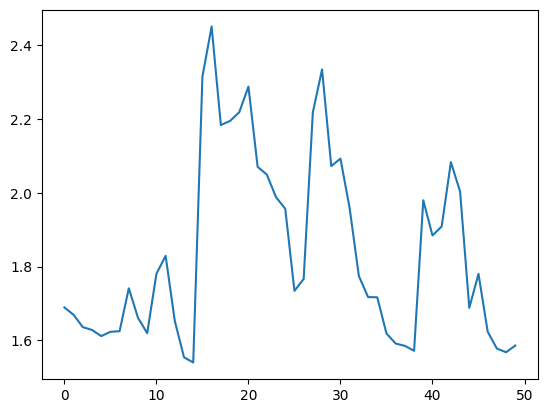

In [116]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

In [88]:
def predict_next_note(
    notes: np.ndarray,
    model: tf.keras.Model,
    temperature: float = 1.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

In [101]:
temperature = 5.0
num_predictions = 120

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

1/1 [==============================] - 0s 31ms/step


In [102]:
generated_notes.head(10)

,pitch,step,duration,start,end
0,41,0.249362,0.438257,0.249362,0.687619
1,70,0.454238,0.000000,0.703600,0.703600
2,78,2.332206,0.000000,3.035806,3.035806
3,73,1.192943,0.000000,4.228749,4.228749
4,75,0.781775,0.000000,5.010524,5.010524
5,78,2.243967,0.000000,7.254491,7.254491
6,75,1.214811,0.000000,8.469302,8.469302
7,78,0.887597,0.000000,9.356899,9.356899
8,64,2.304485,0.000000,11.661384,11.661384
9,68,0.481164,0.000000,12.142548,12.142548


In [109]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [110]:
out_file = 'output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)

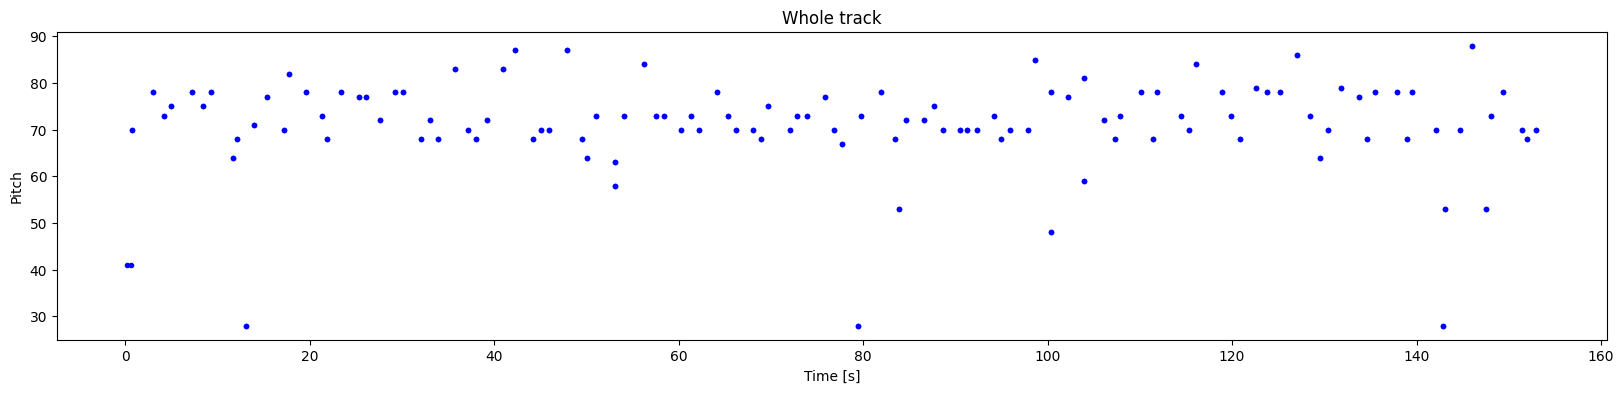

In [105]:
plot_piano_roll(generated_notes)

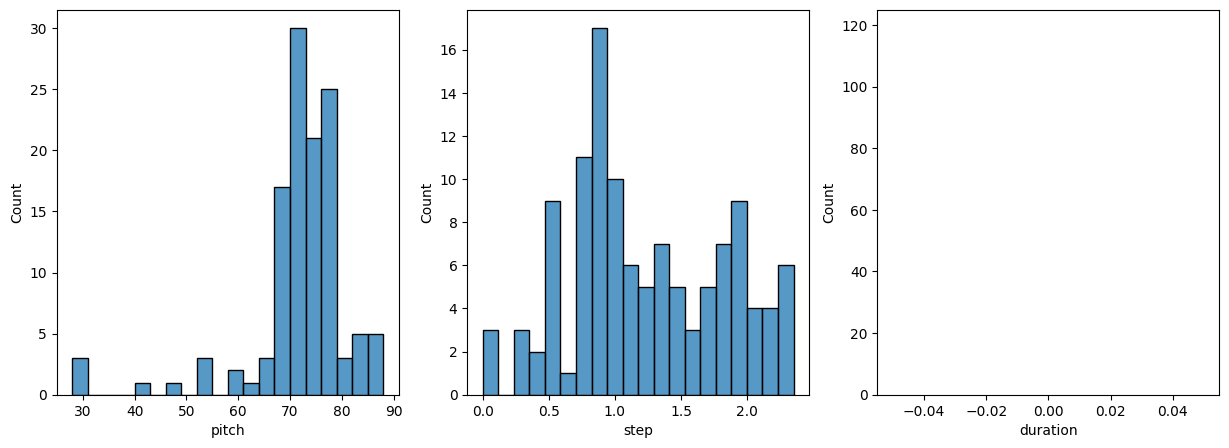

In [106]:
plot_distributions(generated_notes)

In [ ]:
# files.download(out_file)